### Mestrado Profissional em Computação Aplicada

#### **Disciplina**: Redes Neurais Artificiais 
####  **Professor**: Dr. Francisco de Assis Boldt
#### **Aluno**: Adriel Monti De Nardi

------



In [ ]:
# 1. Gerar um dataset de treino linearmente separável

import numpy as np

def geradataset(tamanho=20):
  X = np. random.uniform(size=(tamanho,2)) #X aleatório com dataset com 20 instâncias e 2 características
  y = np.array(X[:,0]>X[:,1],dtype=int)*2-1  #y(rótulo) 
  return X,y

X,y = geradataset(20)
X,y


(array([[0.34313242, 0.70896681],
        [0.42239731, 0.07163279],
        [0.38745743, 0.50530379],
        [0.14617557, 0.51547296],
        [0.98507871, 0.18279644],
        [0.1618412 , 0.17133344],
        [0.0036451 , 0.33519638],
        [0.67539825, 0.5769463 ],
        [0.05137429, 0.89556735],
        [0.78286757, 0.54706616],
        [0.74851397, 0.92737955],
        [0.46656978, 0.11204712],
        [0.01895955, 0.89896972],
        [0.26927027, 0.07657758],
        [0.16633744, 0.17375979],
        [0.90112905, 0.47065946],
        [0.35694429, 0.13265901],
        [0.09540705, 0.31401983],
        [0.21988415, 0.10299292],
        [0.17271376, 0.31938292]]),
 array([-1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
        -1,  1, -1]))

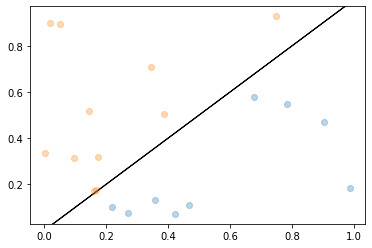

In [ ]:
#2. Plotar dataset de treino (hiperplano separador) 

import matplotlib.pyplot as plt

def plotadataset(X,y):   #função plota o dataset
    for k in set(y):
       plt.plot(X[:,0][y==k],X[:,1][y==k],"o",alpha=0.3)

plotadataset(X,y)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

vetor = [1, -1]

def perpendicular(vetor):
    perp = np.array(vetor[::-1])
    perp[0] *= -1
    return perp

hiperplano = perpendicular(vetor)

plotavetor(hiperplano)

In [ ]:
#3. Perceptron | Custo Perceptron | HingeLoss | Adaline

from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
  @staticmethod
  def erro(y,ypred):
    return y - ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum(CustoPerceptron.erro(y,ypred)**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(CustoPerceptron.erro(y,ypred),X)

class HingeLoss():
  @staticmethod
  def erro(y,ypred):
    return np.multiply(y,ypred)
  @staticmethod
  def custo(y,ypred):
    return np.sum(1 - HingeLoss.erro(y,ypred))
  @staticmethod
  def gradiente(y,ypred, X):
    marginais =  HingeLoss.erro(y,ypred) < 1
    return np.matmul(y[marginais],X[marginais])


class Adaline():
  def __init__(self):
    self.preactivated = True
  @staticmethod
  def erro(y,ypred):
    return y - ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum((1 - Adaline.erro(y,ypred))**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(Adaline.erro(y,ypred),X)



class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron()):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = 0.1
    self.maxiter = 100
    self.custo = custo

  def fit(self, X, y):
    self.w = np.random.uniform(-1, 1, size=2)
    for _ in range(self.maxiter):
      if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
         ypred = self.preactivate(X)
      else:  
         ypred = self.predict(X) 
      custo = self.custo.custo(y,ypred)
      print(custo)
      self.w = self.w + self.alpha*self.custo.gradiente(y,ypred,X)
      if custo == 0:
         break
  def preactivate(self,X):
    return np.matmul(X, self.w)

  def predict(self,X):
    a = self.preactivate(X)
    ypred = self.activation(a)
    return ypred

#Perceptron com custo Adaline
perceptron = Perceptron(custo=Adaline())
perceptron.fit(X,y)
ypred = perceptron.predict(X)
print(sum(y == ypred) /len(y))


38.04830765499695
34.332443826876286
32.61179754333859
31.594607484596448
30.917765582924904
30.445474501858268
30.10976389623154
29.86914234063262
29.69578629572598
29.570340742211076
29.479156028211104
29.41255164672635
29.36364104212671
29.327513550258843
29.300659153713873
29.280562411715913
29.265415288072283
29.25391381327833
29.245113942360312
29.238329248433892
29.233058206248167
29.22893242194917
29.225679704487103
29.223097664954803
29.221034793692503
29.21937685682677
29.2180370836458
29.21694906109593
29.216061566157695
29.215334789303267
29.214737559710624
29.21424529449471
29.21383847337389
29.21350149641767
29.213221822523693
29.21298931478118
29.212795739239784
29.212634378179867
29.212499729446137
29.21238727094435
29.21229327484974
29.21221466003104
29.212148874078526
29.21209379843841
29.212047671714675
29.21200902735554
29.21197664280448
29.211949497845172
29.211926740360962
29.2119076581046
29.211891655362642
29.211878233622336
29.211866975523265
29.2118575315137
2

In [ ]:
#Perceptron com Custo Perceptron
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X,y)
ypred = perceptron.predict(X)
print(sum(y == ypred) /len(y))

16
4
0
1.0


In [ ]:
#Perceptron com Custo Perceptron
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)
ypred = perceptron.predict(X)
print(sum(y == ypred) /len(y))

18
16
4
4
0
1.0
